<a href="https://colab.research.google.com/github/carlakim/Data-Science-for-Business/blob/main/2020195176_Carla_Kim_Gaieski_IDS2014Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
#dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
dataset = fetch_20newsgroups(random_state=1)

documents = dataset.data
targets = dataset.target
print('#samples :',len(documents))
print('#samples :',len(targets))

#samples : 11314
#samples : 11314


#CASE 1

In [ ]:
targets

array([17,  0, 17, ...,  9,  4,  9])

In [ ]:
documents[:5]

['From: ab4z@Virginia.EDU ("Andi Beyer")\nSubject: Re: Israeli Terrorism\nOrganization: University of Virginia\nLines: 15\n\nWell i\'m not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n',
 'F

In [ ]:
target_df = pd.DataFrame({'target': targets})
print(dataset.target_names)
target_df.head()

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


,target
0,17
1,0
2,17
3,11
4,10


In [ ]:
news_df = pd.DataFrame({'document':documents})
# special character removal
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# short word removal
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
news_df.head()

,document,clean_doc
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec...",from virginia andi beyer subject israeli terro...
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...,from timmbake ucsb bake timmons subject amusin...
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,from cleveland freenet mark kaufman subject re...
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...,from cdac berry subject clipper business usual...
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...,from kkeller mail upenn keith keller subject p...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # tokenization
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
print(tokenized_doc[1])


['timmbake', 'ucsb', 'bake', 'timmons', 'subject', 'amusing', 'atheists', 'agnostics', 'lines', 'james', 'hogan', 'writes', 'timmbake', 'ucsb', 'bake', 'timmons', 'writes', 'hogan', 'quips', 'summary', 'stuff', 'afraid', 'missed', 'point', 'thus', 'think', 'admit', 'atheists', 'sleeve', 'might', 'suspected', 'encourage', 'people', 'learn', 'atheism', 'little', 'atheists', 'sleeves', 'whatever', 'might', 'suspected', 'actually', 'quite', 'meager', 'want', 'send', 'address', 'learn', 'less', 'faith', 'faith', 'yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'fine', 'people', 'shoot', 'foot', 'mock', 'idea', 'hope', 'understand', 'understand', 'thank', 'providing', 'healthy', 'sarcasm', 'would', 'dispelled', 'sympathies', 'would', 'faith', 'bake', 'real', 'glad', 'detected', 'sarcasm', 'angle', 'really', 'bummin', 'getting', 'sympathy', 'still', 'inclined', 'sympathy', 'somebody', 'faith', 'm

In [ ]:
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # keep top 1000 words
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

print('TF-IDF size :',X.shape)

TF-IDF size : (11314, 1000)


In [ ]:
#11314 rows = 11314 documents; 1000 words (that we chose to be 1000 based on our restriction)
X.shape

(11314, 1000)

In [ ]:
print(X)

  (0, 672)	0.11222007183689914
  (0, 447)	0.1460112134597553
  (0, 503)	0.10295867438086395
  (0, 71)	0.11560853214220994
  (0, 522)	0.11798671423679456
  (0, 365)	0.1138681703952302
  (0, 719)	0.1484265179827145
  (0, 817)	0.17299209935249305
  (0, 734)	0.15348017255811938
  (0, 157)	0.14275708505859885
  (0, 732)	0.1490303387114173
  (0, 716)	0.11531849601805969
  (0, 891)	0.07541132866830286
  (0, 485)	0.15612196899733324
  (0, 714)	0.15170278649904437
  (0, 290)	0.16003444673725303
  (0, 987)	0.08617275745685637
  (0, 540)	0.5894733442067821
  (0, 842)	0.13972093966943067
  (0, 850)	0.14408050991008953
  (0, 866)	0.09840370296296452
  (0, 929)	0.0601991322573302
  (0, 439)	0.4625753332911188
  (0, 951)	0.2875401336560272
  (1, 544)	0.09006450204012939
  :	:
  (11313, 63)	0.4311740781867803
  (11313, 48)	0.06589936176029414
  (11313, 98)	0.06073546327472741
  (11313, 169)	0.049405204429394146
  (11313, 373)	0.05880118407440317
  (11313, 480)	0.0701427699372923
  (11313, 749)	0.04270

With TF=IDF we want to highlight words that are frequentin one specific document, but not across documents.

In [ ]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) # set the # components
svd_model.fit(X)
len(svd_model.components_)

20

In [ ]:
transformed = svd_model.transform(X)
transformed

array([[ 0.1226233 , -0.09939922, -0.02760445, ...,  0.15504509,
         0.06861834, -0.01778407],
       [ 0.20479689, -0.13362379, -0.09012663, ...,  0.01443534,
        -0.01651042,  0.02270918],
       [ 0.24002229, -0.13448686, -0.04528873, ...,  0.14283537,
         0.15877214, -0.02738084],
       ...,
       [ 0.17235584, -0.0669742 ,  0.0729683 , ...,  0.00080881,
         0.00232256, -0.02977734],
       [ 0.19738104,  0.10590282,  0.08313991, ..., -0.01450428,
         0.02970374, -0.0542836 ],
       [ 0.24044784, -0.06665285,  0.07516567, ...,  0.00301522,
         0.00292822, -0.02549486]])

In [ ]:
print(transformed.shape)
print(X.shape)

(11314, 20)
(11314, 1000)


In [ ]:
#new df with

impdf = pd.DataFrame(transformed)
impdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.122623,-0.099399,-0.027604,0.018124,0.066939,0.010938,-0.030702,-0.005237,0.159802,-0.050856,-0.165183,0.005602,0.128027,0.018235,0.012260,-0.082820,-0.075772,0.155045,0.068618,-0.017784
1,0.204797,-0.133624,-0.090127,-0.085361,0.047217,0.010852,0.027775,-0.046539,-0.111683,0.017846,0.063746,0.019205,0.005841,-0.024371,-0.035278,0.006383,0.022135,0.014435,-0.016510,0.022709
2,0.240022,-0.134487,-0.045289,0.074205,0.182686,0.058706,-0.025885,-0.006377,0.262795,0.014380,-0.135379,-0.095097,0.203966,0.042200,-0.017099,-0.136488,-0.040916,0.142835,0.158772,-0.027381
3,0.165554,-0.030227,-0.092470,0.114398,-0.171096,-0.194415,-0.093528,0.040157,0.015350,0.048506,-0.000345,-0.066141,0.027898,-0.076173,-0.064326,0.029295,0.037277,0.018961,-0.076043,-0.071232
4,0.213076,0.032175,0.095634,0.039444,0.105356,0.016778,-0.044837,0.036805,-0.143326,0.019042,-0.007183,-0.037675,-0.002857,-0.045711,-0.067972,0.044305,0.109542,0.139492,0.036218,0.197773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.073887,-0.008979,0.049855,0.066923,0.091830,0.024522,-0.040726,0.036097,0.039984,0.038565,-0.148262,-0.034904,-0.008269,0.015258,0.028994,-0.003038,-0.097258,0.119457,0.132043,-0.097182
11310,0.145940,-0.005989,0.032423,0.050419,0.061806,0.016070,-0.016299,0.003586,-0.056062,0.046061,-0.019050,-0.011185,-0.058475,0.002784,0.016321,-0.001502,-0.006604,0.014959,0.063323,-0.059692
11311,0.172356,-0.066974,0.072968,-0.075805,-0.050570,-0.001756,0.006255,-0.001912,0.017824,-0.001126,0.002451,0.005277,-0.031428,0.009952,0.024264,-0.028222,0.019960,0.000809,0.002323,-0.029777
11312,0.197381,0.105903,0.083140,0.111590,0.098364,0.003600,-0.034019,0.040118,-0.095339,0.034359,-0.057884,-0.008973,-0.069982,-0.018329,0.005968,0.022258,-0.051400,-0.014504,0.029704,-0.054284


In [ ]:
target_df.shape

(11314, 1)

In [ ]:
import numpy as np

In [ ]:
np.shape(svd_model.components_)

(20, 1000)

In [ ]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('article', 0.18071), ('university', 0.16193), ('posting', 0.15909), ('like', 0.15505), ('host', 0.15301)]
Topic 2: [('windows', 0.33927), ('thanks', 0.17862), ('card', 0.15959), ('host', 0.13829), ('nntp', 0.13518)]
Topic 3: [('team', 0.26083), ('game', 0.24599), ('nntp', 0.19181), ('host', 0.18946), ('posting', 0.18686)]
Topic 4: [('nasa', 0.33948), ('space', 0.21293), ('posting', 0.19156), ('nntp', 0.18929), ('host', 0.18735)]
Topic 5: [('cwru', 0.18295), ('posting', 0.17018), ('host', 0.16925), ('nntp', 0.16883), ('cleveland', 0.16405)]
Topic 6: [('nasa', 0.40828), ('windows', 0.28775), ('space', 0.28202), ('window', 0.12588), ('file', 0.1258)]
Topic 7: [('pitt', 0.3883), ('gordon', 0.33401), ('banks', 0.3164), ('drive', 0.26518), ('nasa', 0.21457)]
Topic 8: [('pitt', 0.40024), ('gordon', 0.32417), ('banks', 0.31587), ('pittsburgh', 0.13856), ('clipper', 0.12806)]
Topic 9: [('state', 0.30525), ('ohio', 0.29765), ('israel', 0.24294), ('cleveland', 0.19818), ('windows', 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#classification - applying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#classification - applying Logistic regression

classifi = LogisticRegression(fit_intercept=False)
classifi.fit(impdf,target_df)
classifi.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-9.21524158e-01, -9.18956583e+00, -3.68251942e+00,
        -1.45319144e+00,  7.91735250e+00,  3.91170905e+00,
         1.61446459e+00, -1.90660995e-01, -4.82906962e+00,
         4.48613800e+00,  1.41065970e+00, -1.44068929e+00,
         3.36455805e-01, -4.19600878e-01, -2.73218333e+00,
         3.71458756e+00,  1.69662137e-01,  1.11235101e+00,
         1.08093267e+00,  3.12415786e+00],
       [ 6.27200453e-01,  1.04134071e+01, -2.51962081e+00,
        -2.52942636e+00, -1.34757738e+00,  5.53665558e+00,
        -1.84350074e+00,  2.64328615e+00, -1.78636058e+00,
        -2.62143209e+00,  9.89270690e-01, -3.07493977e+00,
         1.46623521e+00, -5.62620445e-01, -2.40179618e+00,
        -1.46578276e+00, -2.06672968e+00, -1.62675057e+00,
         1.57826130e+00,  4.26071285e+00],
       [-6.17913078e-01,  1.20235921e+01, -4.45766364e+00,
        -6.05491684e+00,  3.95866123e-01,  3.59657354e+00,
        -1.72729010e+00,  1.49498693e+00,  2.81565805e+00,
         1.98994751e+00, -5.1

In [ ]:
#evaluating model
classifi.score(impdf,target_df)

0.5593954392787697

In [ ]:
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from matplotlib import pyplot

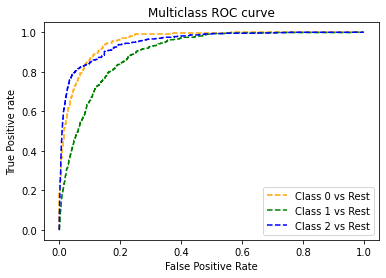

In [ ]:
pred = classifi.predict(impdf)
pred_prob = classifi.predict_proba(impdf)

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(target_df, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

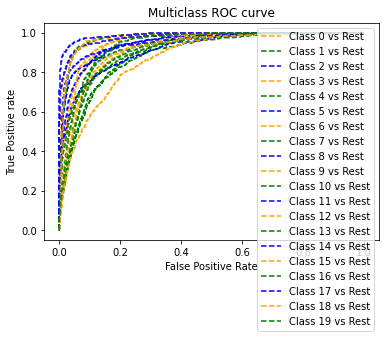

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 20

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(target_df, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='orange', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='green', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='blue', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='orange', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='green', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='blue', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='green', label='Class 13 vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='blue', label='Class 14 vs Rest')
plt.plot(fpr[15], tpr[15], linestyle='--',color='orange', label='Class 15 vs Rest')
plt.plot(fpr[16], tpr[16], linestyle='--',color='green', label='Class 16 vs Rest')
plt.plot(fpr[17], tpr[17], linestyle='--',color='blue', label='Class 17 vs Rest')
plt.plot(fpr[18], tpr[18], linestyle='--',color='orange', label='Class 18 vs Rest')
plt.plot(fpr[19], tpr[19], linestyle='--',color='green', label='Class 19 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

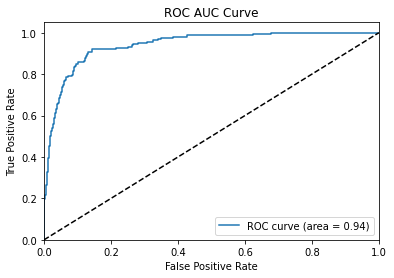

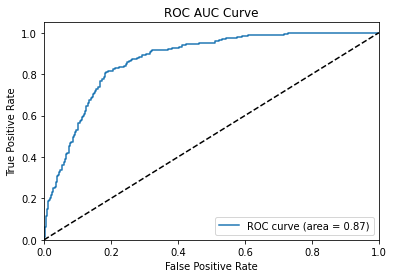

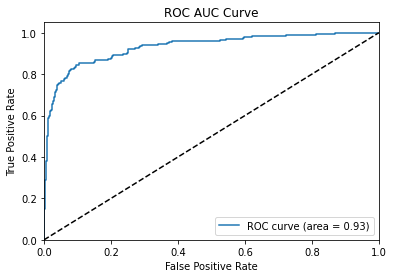

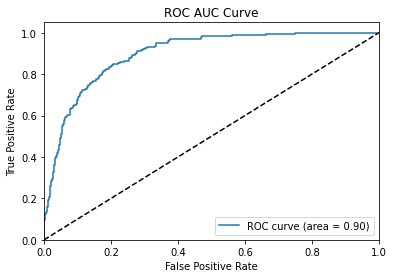

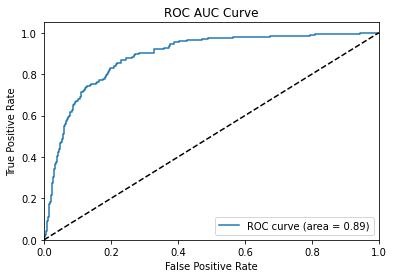

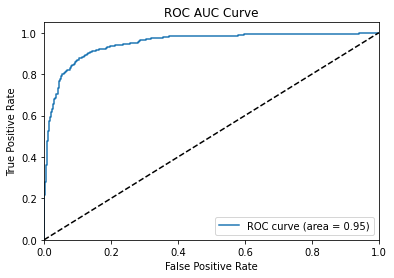

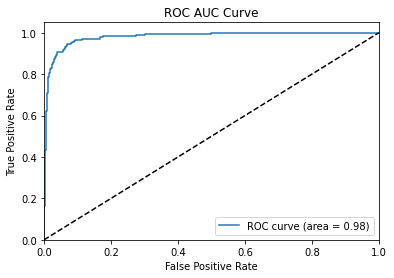

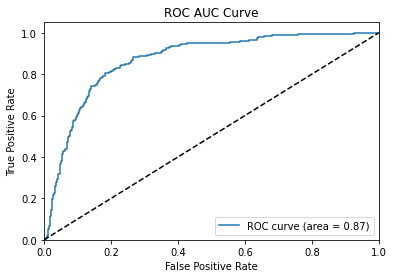

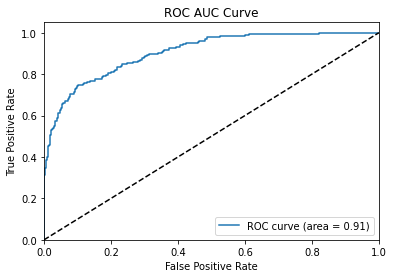

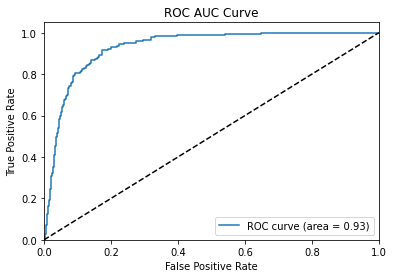

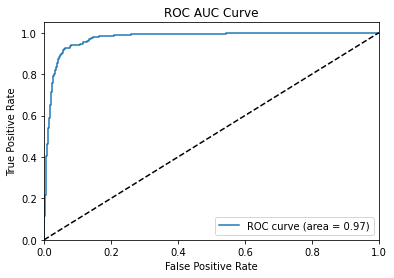

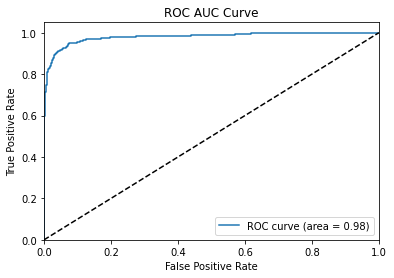

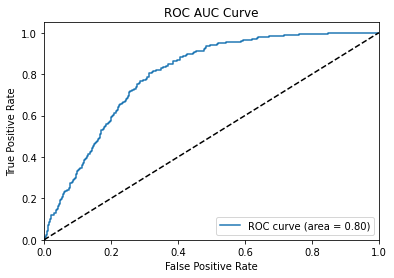

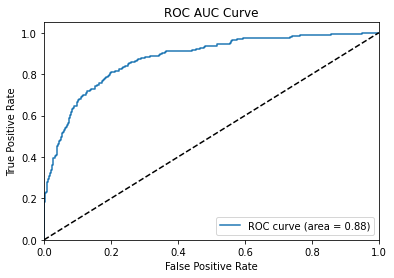

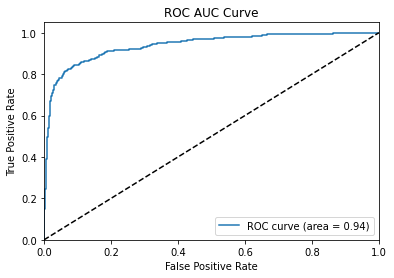

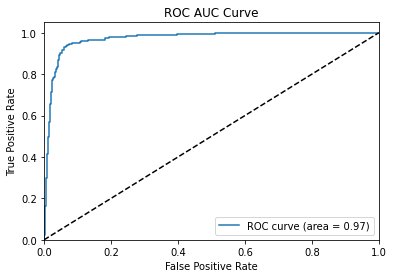

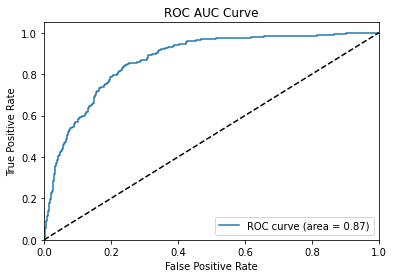

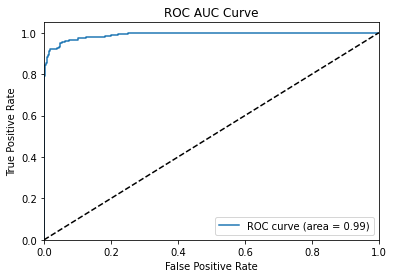

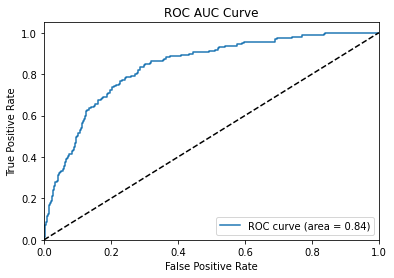

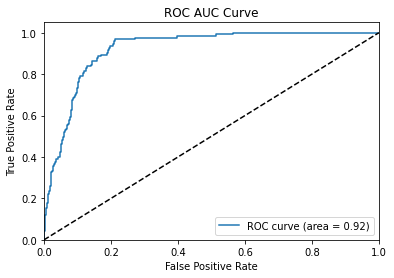

In [ ]:
#AUC ROC CURVE
X = impdf
y = target_df

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
n_classes = 20

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
co = impdf
co.columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"]
w0 = clf.intercept_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


Feature: 0, Score: -0.92152
Feature: 1, Score: -9.18957
Feature: 2, Score: -3.68252
Feature: 3, Score: -1.45319
Feature: 4, Score: 7.91735
Feature: 5, Score: 3.91171
Feature: 6, Score: 1.61446
Feature: 7, Score: -0.19066
Feature: 8, Score: -4.82907
Feature: 9, Score: 4.48614
Feature: 10, Score: 1.41066
Feature: 11, Score: -1.44069
Feature: 12, Score: 0.33646
Feature: 13, Score: -0.41960
Feature: 14, Score: -2.73218
Feature: 15, Score: 3.71459
Feature: 16, Score: 0.16966
Feature: 17, Score: 1.11235
Feature: 18, Score: 1.08093
Feature: 19, Score: 3.12416


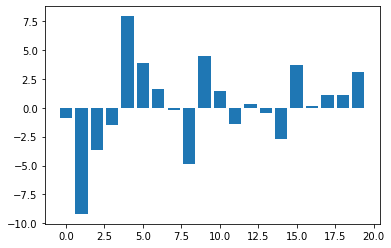

In [ ]:
#FEATURE IMPORTANCE
importance = classifi.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#CASE 2

In [ ]:
#dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
dataset2 = fetch_20newsgroups(random_state=1)

documents2 = dataset2.data
targets2 = dataset2.target
print('#samples :',len(documents2))
print('#samples :',len(targets2))

#samples : 11314
#samples : 11314


In [ ]:
#creating a new target df = targdf
targdf = pd.DataFrame ({'target': documents2})
targdf.head()

,target
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec..."
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...


In [ ]:
#cleaning target df
#if it is academia or not - .edu or not

import re

def email(text):
  email = re.findall(r'@[\w]+\.([\w.]+)',str(text))
  return ",".join(email)

In [ ]:
targdf['email'] = targdf['target'].apply(lambda x: email(x))

targdf['email'] = targdf['email'].apply(lambda x: x.lower())

targdf['email'] = targdf['email'].str.split(',').str[0]

targdf['academic'] = targdf['email'].apply(lambda x: int("edu" in x) if isinstance(x, str) else 0)

targdf['binary'] = np.where(targdf['email'].str.contains("edu"), 'edu', 'notedu')

In [ ]:
targdf.head()

,target,email,academic,binary
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec...",edu,1,edu
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...,ucsb.edu,1,edu
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,freenet.edu,1,edu
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...,cdac.com,0,notedu
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...,sas.upenn.edu,1,edu


In [ ]:
targdf['academic']

0        1
1        1
2        1
3        0
4        1
        ..
11309    1
11310    0
11311    1
11312    0
11313    0
Name: academic, Length: 11314, dtype: int64

In [ ]:
#new targer dataframe with just the binary information if it is an academic e-mail or not
targetdf2 = pd.DataFrame(targdf['academic'])
targetdf2.head()

,academic
0,1
1,1
2,1
3,0
4,1


In [ ]:
#logistic regression

clf = LogisticRegression(fit_intercept=False)
clf.fit(impdf,targetdf2)
clf.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.026619  ,  0.03645465,  4.35833216, -1.61262926,  4.91386388,
        -0.44043014,  2.79099349,  1.96784983, -0.03367269, -1.31692587,
         0.70478327, -0.90541409,  1.73039004, -1.72086767, -3.97950724,
        -0.69363457,  0.63892171,  3.59582216, -6.3293057 , -0.08556629]])

In [ ]:
#evaluate model
clf.score(impdf,targetdf2)

0.6616581226798657

In [ ]:
#evaluate model method 2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [ ]:
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores2 = cross_val_score(clf, impdf, targetdf2, scoring = 'accuracy', cv=cv2, n_jobs=-1, error_score='raise')
print("Accuracy: %.3f (%.ef)" % (mean(n_scores2), std(n_scores2)))

Accuracy: 0.662 (1e-02f)


In [ ]:
X2 = impdf
y2 = targetdf2

#split the dataset into training (70%) and testing (30%) sets
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=0)

#instantiate the model
log_regression2 = LogisticRegression()

#fit the model using the training data
log_regression2.fit(X2_train,y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

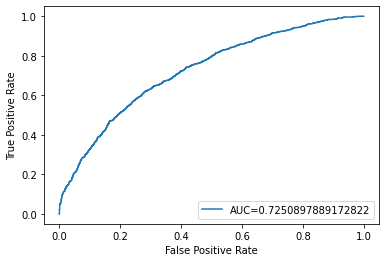

In [ ]:
#define metrics
sy_pred_proba = log_regression2.predict_proba(X2_test)[::,1]
sfpr, stpr, slol = metrics.roc_curve(y2_test,  sy_pred_proba)
sauc = metrics.roc_auc_score(y2_test, sy_pred_proba)

#create ROC curve
plt.plot(sfpr,stpr,label="AUC="+str(sauc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Feature: 0, Score: -1.02662
Feature: 1, Score: 0.03645
Feature: 2, Score: 4.35833
Feature: 3, Score: -1.61263
Feature: 4, Score: 4.91386
Feature: 5, Score: -0.44043
Feature: 6, Score: 2.79099
Feature: 7, Score: 1.96785
Feature: 8, Score: -0.03367
Feature: 9, Score: -1.31693
Feature: 10, Score: 0.70478
Feature: 11, Score: -0.90541
Feature: 12, Score: 1.73039
Feature: 13, Score: -1.72087
Feature: 14, Score: -3.97951
Feature: 15, Score: -0.69363
Feature: 16, Score: 0.63892
Feature: 17, Score: 3.59582
Feature: 18, Score: -6.32931
Feature: 19, Score: -0.08557


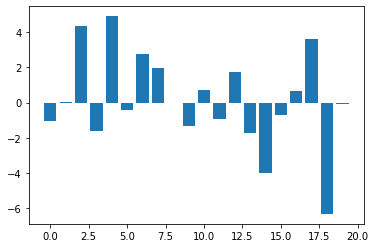

In [ ]:
importante2 = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importante2):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importante2))], importante2)
pyplot.show()

#CASE 3



Use logistic regression to regress receivers' affiliation

In [ ]:
dataset3 = fetch_20newsgroups(random_state=1)

documents3 = dataset3.data
targets3 = dataset3.target
print('#samples :',len(documents3))
print('#samples :',len(targets3))

#samples : 11314
#samples : 11314


In [ ]:
#creating a new df
targetdf3 = pd.DataFrame ({'document': documents3})
targetdf3.head()

,document
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec..."
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...


In [ ]:
#cleaning target df
#find who's the e-mail receiver

import re

def em(text):
  hi = re.findall(r'@[\w]+\.([\w.]+)',str(text))
  return ",".join(hi)

targetdf3['email'] = targetdf3['document'].apply(lambda x: em(x))
targetdf3['email'] = targetdf3['email'].apply(lambda x: x.lower())
targetdf3['email'] = targetdf3['email'].str.split(',').str[1]

targetdf3[:10]

,document,email
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec...",NaN
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...,ucsb.edu
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,NaN
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...,cdac.com
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...,sas.upenn.edu
5,From: HOLFELTZ@LSTC2VM.stortek.com\nSubject: R...,rutgers.edu
6,From: newton@cs.utexas.edu (Peter Newton)\nSub...,utexas.edu
7,From: stssdxb@st.unocal.com (Dorin Baru)\nSubj...,mcgill.edu
8,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...,jpl.nasa.gov
9,From: klg@mookie.mc.duke.edu (Kim Greer)\nSubj...,slb.com


In [ ]:
tg = pd.concat([targetdf3, target_df], axis = 1)
tg = tg.dropna()
tg = tg.reset_index(drop=True)
tg['academic'] = tg['email'].apply(lambda x: int("edu" in x) if isinstance(x, str) else 0)
targetdf3['academic'] = targetdf3['email'].apply(lambda x: int("edu" in x) if isinstance(x, str) else 0)

In [ ]:
rtargetdf3 = pd.DataFrame(tg['academic'])
rtargetdf3

,academic
0,1
1,0
2,1
3,1
4,1
...,...
9327,1
9328,0
9329,1
9330,0


In [ ]:
ntg = tg.drop('target', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
targetdf3 = targetdf3.reset_index(drop=True)
targetdf3

,document,email,academic
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec...",NaN,0
1,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...,ucsb.edu,1
2,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,NaN,0
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...,cdac.com,0
4,From: kkeller@mail.sas.upenn.edu (Keith Keller...,sas.upenn.edu,1
...,...,...,...
11309,From: adams@bellini.berkeley.edu (Adam L. Schw...,berkeley.edu,1
11310,From: levin@bbn.com (Joel B Levin)\nSubject: R...,com,0
11311,From: tedward@cs.cornell.edu (Edward [Ted] Fis...,mit.edu,1
11312,From: mori@volga.mfd.cs.fujitsu.co.jp (Tsuyosh...,mfd.cs.fujitsu.co.jp,0


In [ ]:
targetdf3["email"]

0                         NaN
1                    ucsb.edu
2                         NaN
3                    cdac.com
4               sas.upenn.edu
                 ...         
11309            berkeley.edu
11310                     com
11311                 mit.edu
11312    mfd.cs.fujitsu.co.jp
11313                  uh.edu
Name: email, Length: 11314, dtype: object

In [ ]:
tg3 = pd.DataFrame(targetdf3["email"])

In [ ]:
fdocs = pd.concat([impdf, tg3], axis = 1)
zdocs = fdocs.dropna()
ldocs = zdocs.reset_index(drop=True)
ldocs

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,email
0,0.204797,-0.133624,-0.090127,-0.085361,0.047217,0.010852,0.027775,-0.046539,-0.111683,0.017846,...,0.019205,0.005841,-0.024371,-0.035278,0.006383,0.022135,0.014435,-0.016510,0.022709,ucsb.edu
1,0.165554,-0.030227,-0.092470,0.114398,-0.171096,-0.194415,-0.093528,0.040157,0.015350,0.048506,...,-0.066141,0.027898,-0.076173,-0.064326,0.029295,0.037277,0.018961,-0.076043,-0.071232,cdac.com
2,0.213076,0.032175,0.095634,0.039444,0.105356,0.016778,-0.044837,0.036805,-0.143326,0.019042,...,-0.037675,-0.002857,-0.045711,-0.067972,0.044305,0.109542,0.139492,0.036218,0.197773,sas.upenn.edu
3,0.181493,-0.136726,-0.061946,-0.082018,0.053037,0.034174,0.046950,-0.033751,-0.116580,-0.017438,...,0.024561,0.064598,-0.011009,0.011335,0.016428,-0.043814,-0.043260,-0.012437,-0.051542,rutgers.edu
4,0.210469,0.080666,0.011837,-0.068252,0.043129,-0.050302,0.010075,-0.038792,-0.002947,-0.010167,...,-0.033625,-0.076080,0.203527,-0.122981,0.020273,-0.121360,0.013379,-0.065390,0.005167,utexas.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.073887,-0.008979,0.049855,0.066923,0.091830,0.024522,-0.040726,0.036097,0.039984,0.038565,...,-0.034904,-0.008269,0.015258,0.028994,-0.003038,-0.097258,0.119457,0.132043,-0.097182,berkeley.edu
9328,0.145940,-0.005989,0.032423,0.050419,0.061806,0.016070,-0.016299,0.003586,-0.056062,0.046061,...,-0.011185,-0.058475,0.002784,0.016321,-0.001502,-0.006604,0.014959,0.063323,-0.059692,com
9329,0.172356,-0.066974,0.072968,-0.075805,-0.050570,-0.001756,0.006255,-0.001912,0.017824,-0.001126,...,0.005277,-0.031428,0.009952,0.024264,-0.028222,0.019960,0.000809,0.002323,-0.029777,mit.edu
9330,0.197381,0.105903,0.083140,0.111590,0.098364,0.003600,-0.034019,0.040118,-0.095339,0.034359,...,-0.008973,-0.069982,-0.018329,0.005968,0.022258,-0.051400,-0.014504,0.029704,-0.054284,mfd.cs.fujitsu.co.jp


In [ ]:
mat = ldocs.drop('email', 1)
mat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,0.204797,-0.133624,-0.090127,-0.085361,0.047217,0.010852,0.027775,-0.046539,-0.111683,0.017846,0.063746,0.019205,0.005841,-0.024371,-0.035278,0.006383,0.022135,0.014435,-0.016510,0.022709
1,0.165554,-0.030227,-0.092470,0.114398,-0.171096,-0.194415,-0.093528,0.040157,0.015350,0.048506,-0.000345,-0.066141,0.027898,-0.076173,-0.064326,0.029295,0.037277,0.018961,-0.076043,-0.071232
2,0.213076,0.032175,0.095634,0.039444,0.105356,0.016778,-0.044837,0.036805,-0.143326,0.019042,-0.007183,-0.037675,-0.002857,-0.045711,-0.067972,0.044305,0.109542,0.139492,0.036218,0.197773
3,0.181493,-0.136726,-0.061946,-0.082018,0.053037,0.034174,0.046950,-0.033751,-0.116580,-0.017438,0.075944,0.024561,0.064598,-0.011009,0.011335,0.016428,-0.043814,-0.043260,-0.012437,-0.051542
4,0.210469,0.080666,0.011837,-0.068252,0.043129,-0.050302,0.010075,-0.038792,-0.002947,-0.010167,-0.051055,-0.033625,-0.076080,0.203527,-0.122981,0.020273,-0.121360,0.013379,-0.065390,0.005167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.073887,-0.008979,0.049855,0.066923,0.091830,0.024522,-0.040726,0.036097,0.039984,0.038565,-0.148262,-0.034904,-0.008269,0.015258,0.028994,-0.003038,-0.097258,0.119457,0.132043,-0.097182
9328,0.145940,-0.005989,0.032423,0.050419,0.061806,0.016070,-0.016299,0.003586,-0.056062,0.046061,-0.019050,-0.011185,-0.058475,0.002784,0.016321,-0.001502,-0.006604,0.014959,0.063323,-0.059692
9329,0.172356,-0.066974,0.072968,-0.075805,-0.050570,-0.001756,0.006255,-0.001912,0.017824,-0.001126,0.002451,0.005277,-0.031428,0.009952,0.024264,-0.028222,0.019960,0.000809,0.002323,-0.029777
9330,0.197381,0.105903,0.083140,0.111590,0.098364,0.003600,-0.034019,0.040118,-0.095339,0.034359,-0.057884,-0.008973,-0.069982,-0.018329,0.005968,0.022258,-0.051400,-0.014504,0.029704,-0.054284


In [ ]:
nltk.download('stopwords')

stop_words2 = stopwords.words('english')

tok3 = ntg['email'].apply(lambda x: x.split()) # tokenization
tok3 = tok3.apply(lambda x: [item for item in x if item not in stop_words2])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#detokenize
detokenized_doc3 = []
for i in range(len(ntg)):
    t = ' '.join(tok3[i])
    detokenized_doc3.append(t)

ntg['email'] = detokenized_doc3

In [ ]:
vec = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
U = vec.fit_transform(ntg['email'])
print('TF-IDF size :',U.shape)

TF-IDF size : (9332, 1000)


In [ ]:
sv = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) # set the # components
sv.fit(U)
theU = sv.transform(U)

In [ ]:
udf = pd.DataFrame(theU)
udf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000049,0.215915,-0.000377,-4.390217e-07,-0.025858,-0.000115,-0.000066,-0.000057,-0.008747,-0.007966,-0.003461,-0.006205,-0.006813,-1.669359e-02,0.000069,-0.011052,-0.010338,-0.009269,0.000124,0.000694
1,0.278239,-0.000101,-0.000937,-2.662599e-04,0.000026,-0.000009,-0.000128,0.000012,-0.000255,-0.000040,0.000003,-0.000014,-0.000002,-1.172378e-08,-0.009859,0.000063,0.000104,0.000074,-0.002541,-0.010032
2,0.002434,0.191042,-0.000421,-1.376016e-05,-0.025763,-0.000119,-0.000080,-0.000063,-0.009992,-0.009243,-0.004155,-0.007529,-0.008380,-2.099092e-02,-0.001396,-0.014547,-0.014173,-0.012684,-0.000339,-0.001098
3,0.000092,0.457797,-0.008080,-1.056247e-05,0.888202,0.000767,0.000235,0.000116,0.016434,0.013363,0.004855,0.008230,0.008537,1.918482e-02,-0.000076,0.010859,0.009055,0.008084,-0.000096,-0.000515
4,0.000072,0.275820,0.000776,1.095973e-06,-0.040140,-0.000048,0.000123,0.000404,0.080977,0.006208,-0.011574,0.019094,0.003439,-4.352276e-03,0.000223,-0.011983,-0.037415,0.059665,0.000078,0.000437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.000069,0.319328,-0.000631,-6.680321e-07,-0.056098,-0.000281,-0.000137,-0.000255,-0.035889,-0.037106,-0.024803,-0.030930,-0.047471,-1.585016e-01,0.000807,-0.288319,0.818316,0.318463,-0.001451,-0.006586
9328,0.997613,-0.000361,-0.003280,-9.320383e-04,0.000092,-0.000031,-0.000442,0.000040,-0.000870,-0.000136,0.000011,-0.000046,-0.000005,-3.935032e-08,-0.033039,0.000209,0.000344,0.000246,-0.008372,-0.032989
9329,0.000075,0.346495,-0.000904,-1.065924e-06,-0.067156,-0.000357,-0.000258,-0.000435,-0.081383,-0.115714,0.774084,0.198462,0.113026,1.532255e-01,-0.000510,0.051796,0.033984,0.029005,-0.000284,-0.001459
9330,0.000090,0.010419,0.012161,2.034332e-05,-0.008306,-0.000022,0.003307,-0.000908,-0.008073,-0.013556,-0.055289,0.111040,0.036494,3.737726e-02,0.000041,-0.005045,-0.088000,0.231839,-0.000244,-0.001269


In [ ]:
terms2 = vec.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(sv.components_,terms2)

Topic 1: [('com', 0.99761), ('hp', 0.03767), ('ibm', 0.02833), ('sun', 0.02227), ('att', 0.02164)]
Topic 2: [('edu', 0.97713), ('rutgers', 0.13225), ('cc', 0.04823), ('pitt', 0.04576), ('cmu', 0.04529)]
Topic 3: [('ca', 0.97848), ('carleton', 0.11858), ('bc', 0.05558), ('uvic', 0.05408), ('uwo', 0.05383)]
Topic 4: [('uucp', 1.0), ('ca', 0.00167), ('carleton', 0.0002), ('bc', 0.0001), ('uvic', 9e-05)]
Topic 5: [('rutgers', 0.98593), ('ca', 0.00917), ('carleton', 0.00128), ('bc', 0.00059), ('uvic', 0.00058)]
Topic 6: [('org', 0.98127), ('apc', 0.13581), ('sdpa', 0.0917), ('mitre', 0.05976), ('questor', 0.04855)]
Topic 7: [('uk', 0.84601), ('ac', 0.51387), ('demon', 0.09434), ('ed', 0.06353), ('cam', 0.04427)]
Topic 8: [('gov', 0.76654), ('nasa', 0.57598), ('jpl', 0.19894), ('gsfc', 0.122), ('jsc', 0.09435)]
Topic 9: [('cc', 0.75864), ('columbia', 0.55482), ('utexas', 0.0944), ('purdue', 0.09238), ('au', 0.06915)]
Topic 10: [('uiuc', 0.73232), ('cso', 0.61706), ('cc', 0.15837), ('columbia

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#logistic regression

clf3 = LogisticRegression(fit_intercept=False)
clf3.fit(mat,rtargetdf3)
clf3.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.58308751, -0.89135999,  2.40224934, -1.80842245,  3.65691693,
         0.0812367 ,  2.29392015,  0.87762743,  0.0233935 , -0.78592008,
         1.72480393, -0.80285251,  2.77971829, -0.70229591, -2.1327688 ,
        -1.07599245,  0.36082599,  2.59823174, -3.53836656, -0.68991251]])

In [ ]:
#evaluate model
clf3.score(mat,rtargetdf3)

0.6256965280754393

In [ ]:
cv3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores3 = cross_val_score(clf3, mat, rtargetdf3, scoring = 'accuracy', cv=cv3, n_jobs=-1, error_score='raise')
print("Accuracy: %.3f (%.ef)" % (mean(n_scores3), std(n_scores3)))

Accuracy: 0.624 (2e-02f)


In [ ]:
rX = mat
ry = rtargetdf3

#split the dataset into training (70%) and testing (30%) sets
rX_train,rX_test,ry_train,ry_test = train_test_split(rX,ry,test_size=0.3,random_state=0)

#instantiate the model
rlog_regression = LogisticRegression()

#fit the model using the training data
rlog_regression.fit(rX_train,ry_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

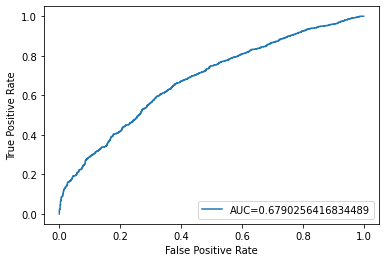

In [ ]:
#define metrics
ry_pred_proba = rlog_regression.predict_proba(rX_test)[::,1]
rfpr, rtpr, rlol = metrics.roc_curve(ry_test,  ry_pred_proba)
rauc = metrics.roc_auc_score(ry_test, ry_pred_proba)

#create ROC curve
plt.plot(rfpr,rtpr,label="AUC="+str(rauc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Feature: 0, Score: -0.58309
Feature: 1, Score: -0.89136
Feature: 2, Score: 2.40225
Feature: 3, Score: -1.80842
Feature: 4, Score: 3.65692
Feature: 5, Score: 0.08124
Feature: 6, Score: 2.29392
Feature: 7, Score: 0.87763
Feature: 8, Score: 0.02339
Feature: 9, Score: -0.78592
Feature: 10, Score: 1.72480
Feature: 11, Score: -0.80285
Feature: 12, Score: 2.77972
Feature: 13, Score: -0.70230
Feature: 14, Score: -2.13277
Feature: 15, Score: -1.07599
Feature: 16, Score: 0.36083
Feature: 17, Score: 2.59823
Feature: 18, Score: -3.53837
Feature: 19, Score: -0.68991


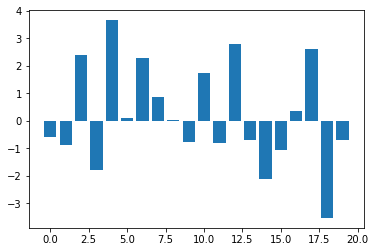

In [ ]:
imp = clf3.coef_[0]
# summarize feature importance
for i,v in enumerate(imp):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(imp))], imp)
pyplot.show()

#CASE 4

In [ ]:
## import dependencies
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##Case 1 decision tree

In [ ]:
#just chnaging the name of the importand df (impdf) to Xdf as it is our X
Xdf = impdf
Xdf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.122623,-0.099399,-0.027604,0.018124,0.066939,0.010938,-0.030702,-0.005237,0.159802,-0.050856,...,0.005602,0.128027,0.018235,0.012260,-0.082820,-0.075772,0.155045,0.068618,-0.017784,17
1,0.204797,-0.133624,-0.090127,-0.085361,0.047217,0.010852,0.027775,-0.046539,-0.111683,0.017846,...,0.019205,0.005841,-0.024371,-0.035278,0.006383,0.022135,0.014435,-0.016510,0.022709,0
2,0.240022,-0.134487,-0.045289,0.074205,0.182686,0.058706,-0.025885,-0.006377,0.262795,0.014380,...,-0.095097,0.203966,0.042200,-0.017099,-0.136488,-0.040916,0.142835,0.158772,-0.027381,17
3,0.165554,-0.030227,-0.092470,0.114398,-0.171096,-0.194415,-0.093528,0.040157,0.015350,0.048506,...,-0.066141,0.027898,-0.076173,-0.064326,0.029295,0.037277,0.018961,-0.076043,-0.071232,11
4,0.213076,0.032175,0.095634,0.039444,0.105356,0.016778,-0.044837,0.036805,-0.143326,0.019042,...,-0.037675,-0.002857,-0.045711,-0.067972,0.044305,0.109542,0.139492,0.036218,0.197773,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.073887,-0.008979,0.049855,0.066923,0.091830,0.024522,-0.040726,0.036097,0.039984,0.038565,...,-0.034904,-0.008269,0.015258,0.028994,-0.003038,-0.097258,0.119457,0.132043,-0.097182,17
11310,0.145940,-0.005989,0.032423,0.050419,0.061806,0.016070,-0.016299,0.003586,-0.056062,0.046061,...,-0.011185,-0.058475,0.002784,0.016321,-0.001502,-0.006604,0.014959,0.063323,-0.059692,13
11311,0.172356,-0.066974,0.072968,-0.075805,-0.050570,-0.001756,0.006255,-0.001912,0.017824,-0.001126,...,0.005277,-0.031428,0.009952,0.024264,-0.028222,0.019960,0.000809,0.002323,-0.029777,9
11312,0.197381,0.105903,0.083140,0.111590,0.098364,0.003600,-0.034019,0.040118,-0.095339,0.034359,...,-0.008973,-0.069982,-0.018329,0.005968,0.022258,-0.051400,-0.014504,0.029704,-0.054284,4


In [ ]:
#changing the name of the target_df to targetdf1 as it is the target only in case 1 and matches the others
targetdf1 = target_df
targetdf1

,target
0,17
1,0
2,17
3,11
4,10
...,...
11309,17
11310,13
11311,9
11312,4


In [ ]:
targetdf1.describe()

,target
count,11314.000000
mean,9.293000
std,5.562719
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [ ]:
tdf1 = Xdf.append(targetdf1)
tdf1 = tdf1.dropna()
tdf1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.122623,-0.099399,-0.027604,0.018124,0.066939,0.010938,-0.030702,-0.005237,0.159802,-0.050856,...,0.005602,0.128027,0.018235,0.012260,-0.082820,-0.075772,0.155045,0.068618,-0.017784,17
1,0.204797,-0.133624,-0.090127,-0.085361,0.047217,0.010852,0.027775,-0.046539,-0.111683,0.017846,...,0.019205,0.005841,-0.024371,-0.035278,0.006383,0.022135,0.014435,-0.016510,0.022709,0
2,0.240022,-0.134487,-0.045289,0.074205,0.182686,0.058706,-0.025885,-0.006377,0.262795,0.014380,...,-0.095097,0.203966,0.042200,-0.017099,-0.136488,-0.040916,0.142835,0.158772,-0.027381,17
3,0.165554,-0.030227,-0.092470,0.114398,-0.171096,-0.194415,-0.093528,0.040157,0.015350,0.048506,...,-0.066141,0.027898,-0.076173,-0.064326,0.029295,0.037277,0.018961,-0.076043,-0.071232,11
4,0.213076,0.032175,0.095634,0.039444,0.105356,0.016778,-0.044837,0.036805,-0.143326,0.019042,...,-0.037675,-0.002857,-0.045711,-0.067972,0.044305,0.109542,0.139492,0.036218,0.197773,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.073887,-0.008979,0.049855,0.066923,0.091830,0.024522,-0.040726,0.036097,0.039984,0.038565,...,-0.034904,-0.008269,0.015258,0.028994,-0.003038,-0.097258,0.119457,0.132043,-0.097182,17
11310,0.145940,-0.005989,0.032423,0.050419,0.061806,0.016070,-0.016299,0.003586,-0.056062,0.046061,...,-0.011185,-0.058475,0.002784,0.016321,-0.001502,-0.006604,0.014959,0.063323,-0.059692,13
11311,0.172356,-0.066974,0.072968,-0.075805,-0.050570,-0.001756,0.006255,-0.001912,0.017824,-0.001126,...,0.005277,-0.031428,0.009952,0.024264,-0.028222,0.019960,0.000809,0.002323,-0.029777,9
11312,0.197381,0.105903,0.083140,0.111590,0.098364,0.003600,-0.034019,0.040118,-0.095339,0.034359,...,-0.008973,-0.069982,-0.018329,0.005968,0.022258,-0.051400,-0.014504,0.029704,-0.054284,4


In [ ]:
# The decision tree classifier.
dtclf = tree.DecisionTreeClassifier()
# Training the Decision Tree
dtclf_1 = dtclf.fit(tdf1, tdf1['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[20] <= 7.5\ngini = 0.949\nsamples = 11314\nvalue = [480, 584, 591, 590, 578, 593, 585, 594, 598, 597\n600, 595, 591, 594, 593, 599, 546, 564, 465, 377]"] ;
1 [label="X[20] <= 6.5\ngini = 0.875\nsamples = 4595\nvalue = [480, 584, 591, 590, 578, 593, 585, 594, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[20] <= 5.5\ngini = 0.857\nsamples = 4001\nvalue = [480, 584, 591, 590, 578, 593, 585, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[20] <= 4.5\ngini = 0.832\nsamples = 3416\nvalue = [480, 584, 591, 590, 578, 593, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]"] ;
2 -> 3 ;
4 [label="X[20] <= 3.5\ngini = 0.799\nsamples = 2823\nvalue = [480, 584, 591, 590, 578, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]"] ;
3 -> 4 ;
5 [label="X[20] <= 2.5\ngini = 0.748\nsamples = 2245\nvalue = [480, 584, 591, 590, 0, 0, 0, 0, 0,

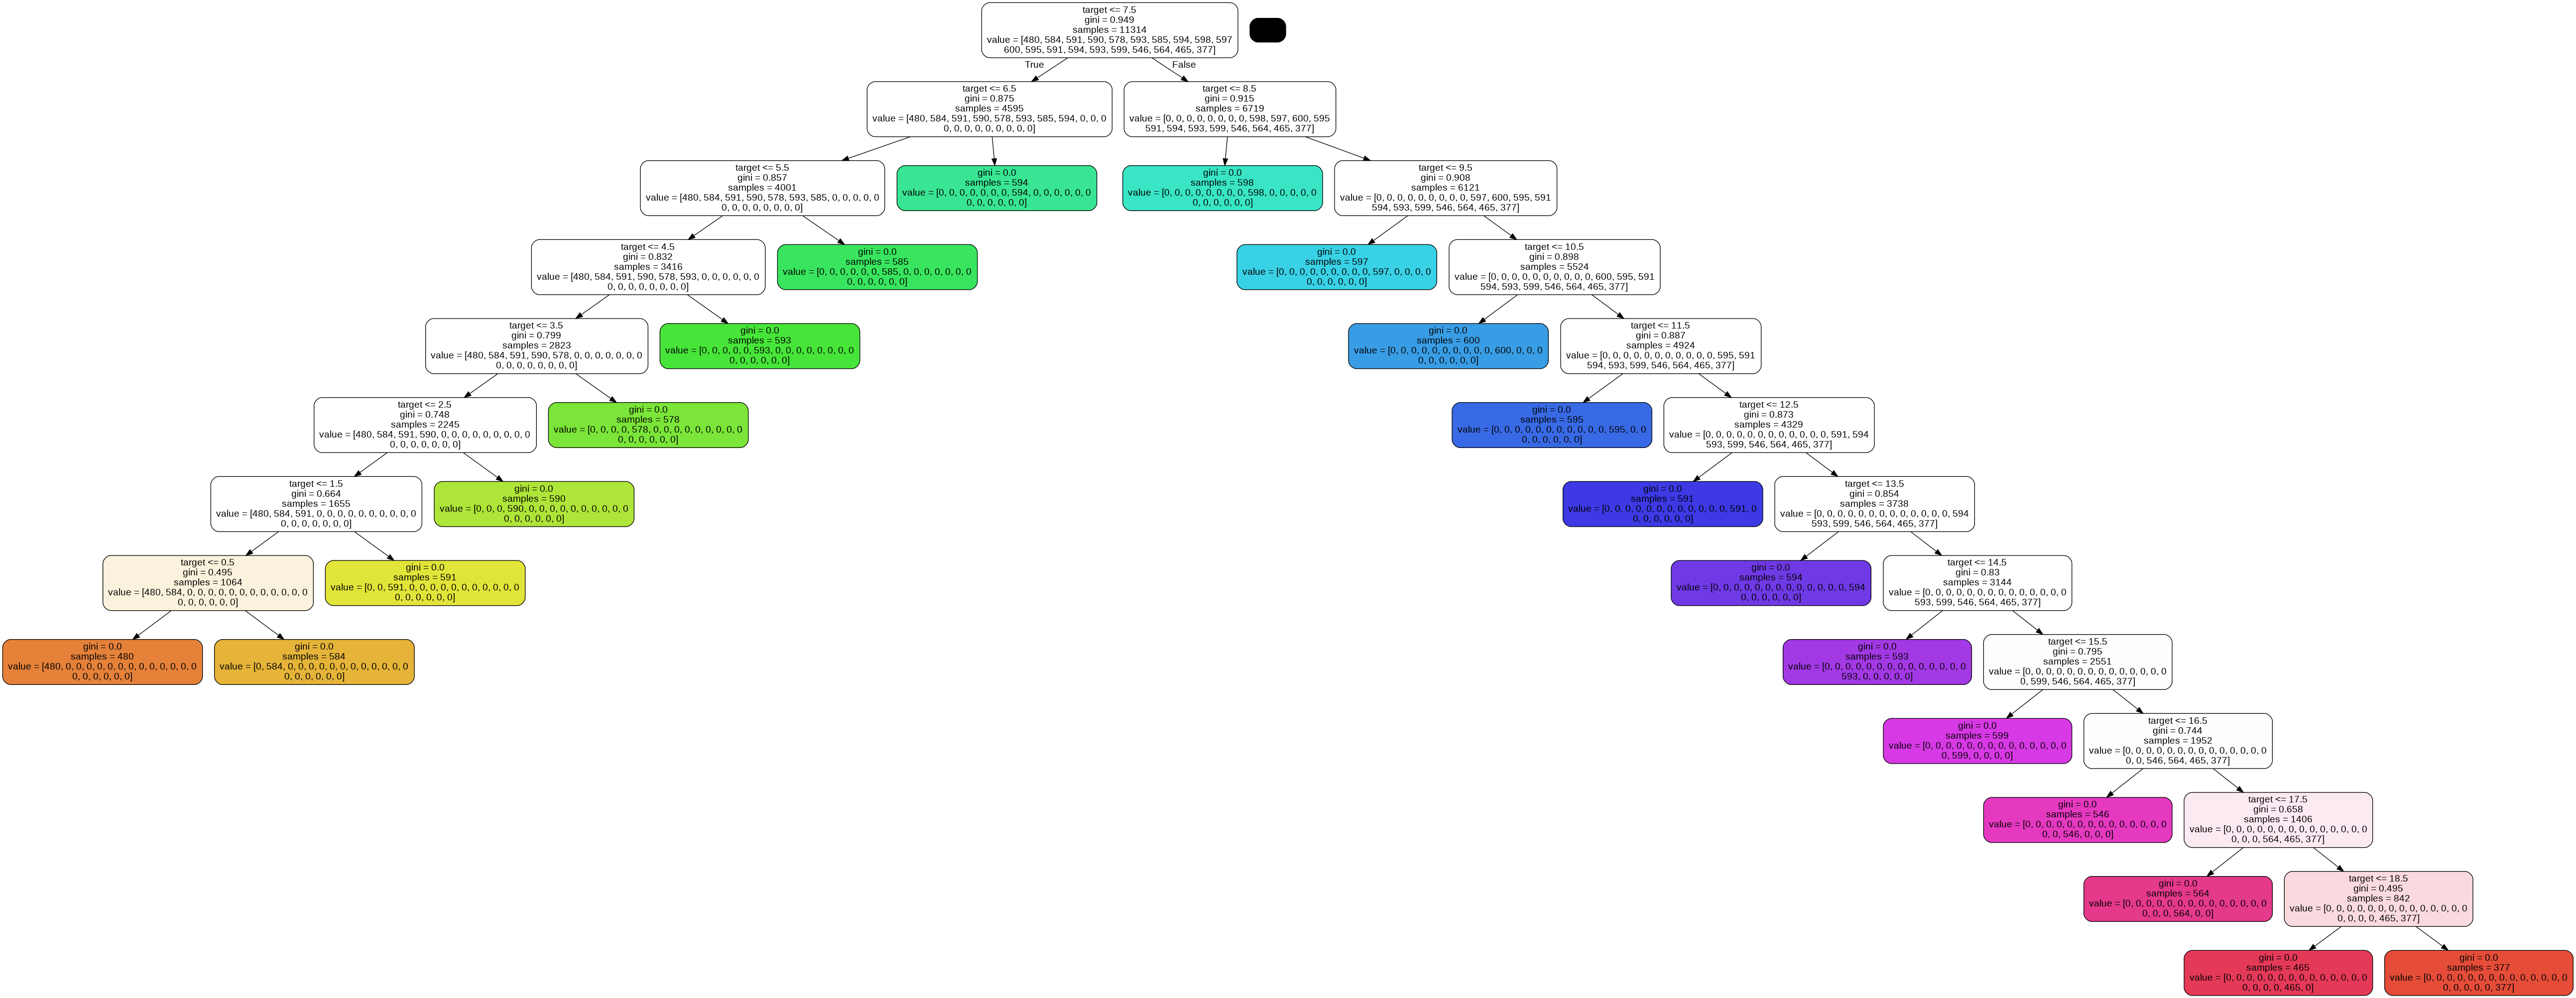

In [ ]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(dtclf_1, None))

#Create Dot Data
#want to use training data, outfile, featurenames of data-list
dot_data = tree.export_graphviz(dtclf_1, out_file=None, feature_names=list(Xdf.columns.values),
                               rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
# The score method returns the accuracy of the model
score = dtclf.score(Xdf, targetdf1)
print("The accuracy is: ", score)

The accuracy is:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
